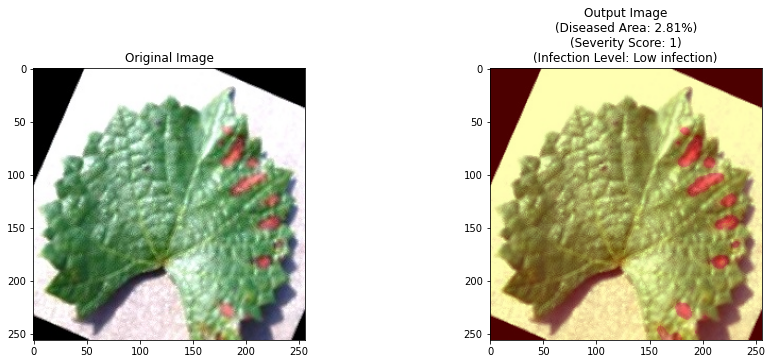

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('/Users/hemalatha/Downloads/Augmented_and_Enhanced/Grape - Esca (Black Measles)_0.jpg')

# Convert the image to HSV color space
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Define the range of brown color in HSV color space
lower_brown = np.array([0, 50, 50])
upper_brown = np.array([30, 255, 255])

# Create a mask that selects only brown pixels in the range
mask = cv2.inRange(hsv_img, lower_brown, upper_brown)

# Apply a median filter to reduce noise
mask = cv2.medianBlur(mask, 5)

# Invert the mask to get the diseased spots in white
inv_mask = cv2.bitwise_not(mask)

# Convert the image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply the mask on the grayscale image
masked_img = cv2.bitwise_and(gray_img, gray_img, mask=inv_mask)

# Apply color mapping to the masked image to highlight the diseased spots in brown color
colormask = cv2.applyColorMap(masked_img, cv2.COLORMAP_AUTUMN)

# Combine the color mask with the original image
output = cv2.addWeighted(img, 0.7, colormask, 0.3, 0)

# Calculate the percentage of the diseased area
total_pixels = img.shape[0] * img.shape[1]
diseased_pixels = np.count_nonzero(mask == 255)
diseased_area_percentage = (diseased_pixels / total_pixels) * 100

# Assign a severity score and corresponding infection level based on the percentage of leaf area affected
if diseased_area_percentage <= 15:
    severity_score = 1
    infection_level = "Low infection"
elif diseased_area_percentage <= 50:
    severity_score = 2
    infection_level = "Moderate infection"
else:
    severity_score = 3
    infection_level = "High infection"

# Display the original image and the output image with severity score and infection level
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[1].imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
ax[1].set_title('Output Image\n(Diseased Area: {:.2f}%)\n(Severity Score: {})\n(Infection Level: {})'.format(diseased_area_percentage, severity_score, infection_level))
plt.show()